In [9]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

dates = []
prices = []

def get_data(filename):
    csvfile = open(filename, 'r')
    csvFileReader = csv.reader(csvfile)
    next(csvFileReader) #to skip the first ligne/row
    for row in csvFileReader:
        dates.append(int(row[0].split('-')[0]))
        prices.append(float(row[1]))
    csvfile.close()
    return

In [10]:
def preditct_prices(dates, prices, x):
            dates = np.reshape(dates, (len(dates),1))

            svr_lin = SVR(kernel= 'linear' , C=1e3)
            svr_poly = SVR(kernel= 'poly' , C=1e3, degree = 2)
            svr_rbf = SVR(kernel= 'rbf' , C=1e3, gamma = 0.1)
            print('Fit Linear')
            svr_lin.fit(dates, prices)
            #print('Fit poly')
            #svr_poly.fit(dates, prices)
            #print('Fit RBF')
            #svr_rbf.fit(dates, prices)

            plt.scatter(dates, prices, color='black', label='Data')
            #plt.plot(dates, svr_rbf.predict(dates), color='red' , label ='RBF model')
            plt.plot(dates, svr_lin.predict(dates), color='green' , label ='Linear model')
            #plt.plot(dates, svr_poly.predict(dates), color='blue' , label ='Ploynomial model')
            plt.xlabel('Date')
            plt.ylabel('Price')
            plt.title('Support Vector Regression')
            plt.legend()
            plt.show()
            #return svr_rbf.predict(x)[0],svr_lin.predict(x)[0],svr_poly.predict(x)[0]
            return svr_lin.predict(x)[0]#,svr_poly.predict(x)[0]

starting ...
Fit Linear


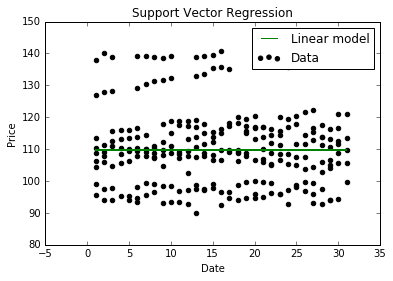

109.619029023


In [11]:
def main():
    print ('starting ...')
    get_data('aapl1.csv')
    predicted_price = preditct_prices(dates, prices, 29)
    print(predicted_price)

if __name__ == "__main__":
    main()
    